# Notebook 9: Nyquist, Frequency Specifications and Time Delays

© 2024 ETH Zurich, Mark Benazet Castells, Jonas Holinger, Felix Muller, Matteo Penlington; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli

This interactive notebook is designed to introduce fundamental concepts in control systems engineering. It covers ...

Authors:
- Jonas Holinger; jholinger@ethz.ch
- Shubham Gupta; shugupta@ethz.ch

# Learning Objectives

...

In [ ]:
# import libraries

%pip install numpy matplotlib scipy ipywidgets control IPython sympy

import control as ct
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')


# Motivation

In the past few weeks we have looked at different methods to analyze a system. Firstly we looked at the root-locus to analyze time-domain specifications in terms of design feasibility. Then we considered that some specifications may be frequency dependent, thus motivating the need to analyze the frequency response of a system. Thus far, we have introduced the bode plot and polar form as tools we can use to analyze the frequency response of a system. However, as discussed in the lecture, the interpretations from the bode plot typically only hold for stable systems $^*$. Thus, this week we introduce another tool that can be used to investigate the frequency response of any system, *the Nyquist*. It can be used on any type of system, and consequentially, is the most authoritative closed-loop stability test. However, it is difficult to draw and use for sophisticated design, which is why the root locus and bode plots are preferable if applicable.

Furthermore, to contextualize how one may use the frequency response, we introduce frequency domain specifications and robustness (gain/phase) margins as the frequency equivalent of the time-domain specifications seen in Lecture 8 (Notebook 7).

$^*$ To see why this is the case, recall from Lecture 5, that the output response is the superposition of the transient and steady-state responses. Further, when the system is (asymptotically) stable, the transient response tends to $0$, and thus the output response, for large $t$, is the steady-state response. This is not the case for unstable systems.

# Introduction to Nyquist Stability Criterion


In this section, we'll explore fundamental concepts in control systems that help us determine the stability of a closed-loop system by analyzing its open-loop transfer function.

We'll start by understanding the **Principle of the Argument**, then learn about the **Nyquist Plot**, and finally the **Nyquist Stability Criterion** itself.




## Principle of Variation of the Argument




The **Principle of the Argument** is a concept from complex analysis that relates the number of zeros and poles of a complex function inside a closed contour to the net change in the argument (angle) of the function along that contour.



### Mathematical Explanation



For a complex function $ F(s) $, where $ s $ is a complex variable, the principle states:

\[
N = Z - P
\]

- **$ N $**: Net number of times the function's plot encircles the origin (counter-clockwise direction counted as positive) as $ s $ traverses the contour.
- **$ Z $**: Number of zeros of $ F(s) $ inside the contour.
- **$ P $**: Number of poles of $ F(s) $ inside the contour.



### Intuitive Understanding



Imagine walking along a path in the complex plane, tracing the function $ F(s) $ as $ s $ moves along some closed contour. The principle tells us that the total number of times you wind around the origin, counting direction ( this corresponds to the total change in the argument/angle of the function) equals the number of zeros minus the number of poles inside the path.




## Nyquist Plot




A **Nyquist Plot** is a graphical representation of a complex transfer function $ L(s) $ when $ s = j\omega $, where $ \omega $ ranges from $-\infty$ to $ \infty $. It maps the frequency response of the open-loop system onto the complex plane.



### How to Construct a Nyquist Plot



1. **Determine $ L(j\omega) $**: Substitute $ s = j\omega $ into the open-loop transfer function $ L(s) $.
2. **Calculate Magnitude and Phase**: For each frequency $ \omega $, compute the magnitude $ |L(j\omega)| $ and phase angle $ \angle L(j\omega) $.
3. **Plot on Complex Plane**: Plot the complex numbers $ L(j\omega) $ on the real-imaginary plane as $ \omega $ varies from $-\infty$ to $ \infty $.



### Key Features



- **Symmetry**: For systems with real coefficients, the Nyquist plot is symmetrical about the real axis.
- **Encirclements**: The way the plot encircles the critical point $-1k + j0$ is crucial for stability analysis.
- **Mapping Frequency**: Low frequencies start near the origin, while high frequencies extend outward.



### Visual Interpretation



The Nyquist plot provides a visual means to assess how the system's gain and phase shift affect stability. By observing how the plot wraps around the critical point, we can infer the system's tendency to oscillate or remain stable.




## Nyquist Stability Criterion



### Purpose



The **Nyquist Stability Criterion** allows us to determine the stability of a closed-loop control system by examining its open-loop transfer function $ L(s) $ without explicitly calculating the closed-loop poles. For a system with open-loop transfer function $L(s)$ and a feedback gain $K$, we can analyse the stability of the closed loop using only the Nyquist plot of $L(s)$. 



### The Criterion Explained



Given:

- **$ P $**: Number of poles of $ L(s) $ in the right-half of the complex plane (unstable poles).
- **$ N $**: Net number of clockwise encirclements of the critical point $-1/k + j0$ by the Nyquist plot of $ L(j\omega) $.
- **$ Z $**: Number of poles of the closed loop system $\frac{L(s)}{1 + KL(s)} $ in the right-half plane.

The Nyquist Stability Criterion states:

\[
Z = N + P
\]

**Interpretation:**

- If $ Z = 0 $, all closed-loop poles are in the left-half plane (stable system).
- A positive $ Z $ indicates the number of unstable poles in the closed-loop system.



### Applying the Criterion Step-by-Step



1. **Identify $ P $**: Count the number of RHP poles of the open-loop transfer function $ L(s) $.
2. **Plot Nyquist Diagram**: Create the Nyquist plot for $ L(j\omega) $.
3. **Determine $ N $**: Count the net number of clockwise encirclements of $-1 + j0$.
   - Clockwise encirclement: $ N > 0 $.
   - Counter-clockwise encirclement: $ N < 0 $.
4. **Compute $ Z $**: Use $ Z = N + P $.
5. **Assess Stability**: If $ Z = 0 $, the system is stable.



### Important Considerations



- **Contour Selection**: The Nyquist contour must encircle the entire right-half s-plane.
- **Poles on Imaginary Axis**: If $ L(s) $ has poles on the imaginary axis, modifications to the criterion are needed.
- **Countind Encirclements**: Draw a line out from the -1/k point in any arbitrary direction. Count the number of times that the Nyquist path crosses the line in the clockwise direction, and subtract the number of times it crosses in the counterclockwise direction. You get the number of clockwise encirclements of the -1/k point.



### Example


Suppose $ L(s) $ has one RHP pole ($ P = 1 $) and a feedback gain K = 1.

- **Case 1**: Nyquist plot encircles $-1 + j0$ once clockwise ($ N = 1 $).
  - $ Z = N + P = 1 + 1 = 2 $.
  - The closed-loop system has two RHP poles ($ Z = 2 $) → **Unstable**.
  
- **Case 2**: Nyquist plot does not encircle $-1 + j0$ ($ N = 0 $).
  - $ Z = N + P = 0 + 1 = 1 $.
  - The closed-loop system has one RHP pole ($ Z = 1 $) → **Unstable**.
  
- **Case 3**: Nyquist plot encircles $-1 + j0$ once counter-clockwise ($ N = -1 $).
  - $ Z = N + P = -1 + 1 = 0 $.
  - The closed-loop system has no RHP poles ($ Z = 0 $) → **Stable**.

Use the code below to try some transfer functions and view the Nyquist plot, to figure out the closed loop behaviour

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown
import control

def parse_coefficients(coeff_str):
    """
    Parse a string of coefficients separated by commas into a list of floats.
    """
    try:
        coeffs = [float(c.strip()) for c in coeff_str.split(',') if c.strip()]
        if not coeffs:
            raise ValueError("Coefficient list cannot be empty.")
        return coeffs
    except ValueError as e:
        raise ValueError(f"Invalid input: {e}")

def generate_nyquist_and_poles(b, c, k):
    """
    Generate Nyquist plot for L(s) and display poles of closed-loop transfer function T(s).
    """
    with output:
        clear_output(wait=True)
        try:
            # Parse numerator and denominator coefficients
            num = parse_coefficients(b)
            den = parse_coefficients(c)
            
            # Create open-loop transfer function L(s)
            L = control.TransferFunction(num, den)
            
            # Generate Nyquist plot
            plt.figure(figsize=(8,6))
            control.nyquist_plot(L)
            # plt.title('Nyquist Plot of L(s)')
            plt.hold()
            # plt.show()
            
            # Compute closed-loop transfer function T(s) = L(s) / (1 + L(s))
            T = control.feedback(L, k)
            
            # Get poles of closed-loop transfer function
            poles = control.poles(T)
            


            
            # # Display closed-loop poles
            # display(Markdown("**Closed-Loop Poles ($ T(s) $):**"))
            # for idx, pole in enumerate(poles, 1):
            #     display(Markdown(f"- Pole {idx}: {pole:.4f}"))
            
        except ValueError as ve:
            display(Markdown(f"**Error:** {ve}"))
        except Exception as e:
            display(Markdown(f"**An unexpected error occurred:** {e}"))

# Input widgets for numerator and denominator coefficients
numerator_input = widgets.Text(
    value='',
    placeholder='Enter a list of coefficients separated by commas, highest order first',
    description='Numerator:',
    disabled=False
)

denominator_input = widgets.Text(
    value='',
    placeholder='Enter a list of coefficients separated by commas, highest order first',
    description='Denominator:',
    disabled=False
)

feedback_gain = widgets.FloatText(
    value=1.0,
    description='Feedback Gain:',
    disabled=False
)

# Button to generate Nyquist plot and poles
generate_button = widgets.Button(
    description='Generate Nyquist Plot',
    button_style='success',
    tooltip='Click to generate Nyquist plot and compute closed-loop poles',
    # icon='check'
)

# Output area
output = widgets.Output()

# Event handler for button click
def on_button_click(b):
    generate_nyquist_and_poles(numerator_input.value, denominator_input.value, feedback_gain.value)

generate_button.on_click(on_button_click)

# Display the widgets
display(numerator_input, denominator_input, generate_button,feedback_gain, output)



# Gain and Phase Margin



The distance from the Nyquist plot to the -1 point is a measure of system robustness or how far our system is from instability. On the Bode plot, we measure this robustness using the **gain margin** and **phase margin**.

For a system to be stable, the magnitude plot should be below 0 dB when the phase plot crosses -180°.

* The gain crossover frequency, $ \omega_c $, is the frequency where the Bode plot crosses 0 dB, that is, where $ \left| L(j\omega_c) \right| = 1 $.
* The phase crossover frequency, $ \omega_{pc} $, is the frequency where the Bode plot crosses -180°, that is, where $ \angle L(j\omega_{pc}) = -180° $.

> The **gain margin** is the distance from the current magnitude to 0 dB at the phase crossover frequency, $ \omega_{pc} $. 
> Similarly, the **phase margin** is the distance between the current phase and -180° at the gain crossover frequency, $ \omega_c $.

**Remember:** Gain and phase margin can only be used if the system is open-loop stable and has minimum phase.



### Visualization


Try calculating the gain and phase margin by hand and then try to validate your calculation with the interactive plot.


In [ ]:
def bode_plot_with_margins(num, den):

    sys = ct.TransferFunction(num, den)
    gm, pm, wcg, wcp = ct.margin(sys)

    mag, phase, omega = ct.bode_plot(sys, dB=True, deg=True, plot=False)
    mag = 20 * np.log10(mag)
    phase = np.degrees(phase)

    plt.figure(figsize=(10, 8))
    plt.subplot(2, 1, 1)
    plt.semilogx(omega, mag, label='Magnitude (dB)')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

    if not np.isnan(wcp):
      plt.plot(wcp, 0, 'ro', label=f'Gain Crossover @ {wcp:.2f} rad/s')
    if gm != float('inf'):
        plt.vlines(wcg, 0, -20 * np.log10(gm), color='red', linestyle=':', label=f'Gain Margin = {20 * np.log10(gm):.2f} dB')

    plt.ylabel('Magnitude (dB)')
    plt.legend(loc='best')
    plt.grid(True, which="both")

    plt.subplot(2, 1, 2)
    plt.semilogx(omega, phase, label='Phase (degrees)')
    plt.axhline(-180, color='black', linewidth=0.5, linestyle='--')

    if not np.isnan(wcg):
      plt.plot(wcg, -180, 'bo', label=f'Phase Crossover @ {wcg:.2f} rad/s')
    if pm != float('inf'):
        plt.vlines(wcp, -180, -180 + pm, color='red', linestyle=':', label=f'Phase Margin = {pm:.2f} degrees')

    plt.ylabel('Phase (degrees)')
    plt.xlabel('Frequency (rad/s)')
    plt.legend(loc='best')
    plt.grid(True, which="both")

    print("Gain Margin (dB):", 20 * np.log10(gm) if gm > 0 else 'Infinity')
    print("Phase Margin (degrees):", pm)
    print("Gain Crossover Frequency (rad/s):", wcp)
    print("Phase Crossover Frequency (rad/s):", wcg)

    plt.tight_layout()
    plt.show()

def update_bode_plot(b):
    clear_output(wait=True)
    display(widgets.VBox([numerator_text, denominator_text, plot_button]))

    try:
        num = [float(x) for x in numerator_text.value.split(',')]
        den = [float(x) for x in denominator_text.value.split(',')]
        bode_plot_with_margins(num, den)
    except ValueError:
        print("Please enter valid coefficients separated by commas.")

numerator_text = widgets.Text(value='100', description='Numerator:', placeholder='e.g., 10,4')
denominator_text = widgets.Text(value='1,10,100', description='Denominator:', placeholder='e.g., 12,30,50')
plot_button = widgets.Button(description="Plot Bode")

plot_button.on_click(update_bode_plot)

# Display the widgets
display(widgets.VBox([numerator_text, denominator_text, plot_button]))


# Frequency Domain Specifications

We are already familiar with two frequency-domain specifications: the gain and phase margins. There are several other important specifications we can use to categorize our system.

**Low Frequencies**  
Commands and disturbances usually occur at low frequencies, up to $ 10 $ Hz.  
Good command tracking and disturbance rejection mean ensuring a low sensitivity function $ |S(j\omega)| < 1 $ or having the complementary sensitivity function $ |T(j\omega)| \approx 1 $.

**High Frequencies**  
Noise typically occurs at high frequencies, above $ 100 $ Hz. To reduce the effect of the noise on the system output, $ |T(j\omega)| $ should be small.

**Bandwidth**  
The bandwidth is the maximum frequency $ \omega $ for which our closed-loop system satisfies:
$$ |T(j\omega)| > \frac{1}{\sqrt{2}} $$
or
$$ |T(j\omega)| > -3 \text{ dB} $$

The closed-loop bandwidth is approximately the open-loop crossover frequency and refers to the range of frequencies over which a system can respond effectively. The bandwidth can be viewed as the system's ability to follow a signal or react to inputs in the frequency domain.

A wide bandwidth allows the system to respond to high-frequency components of the input, but it may also amplify high-frequency noise or undesirable signals, potentially leading to noise issues in the system.

Conversely, a narrow bandwidth reduces noise sensitivity but also limits the system’s ability to respond to high-frequency signals.


# Time Delays

A time delay refers to the phenomenon where there's a delay to the input to the system that results in a delayed output. This delay can occur due to various reasons, such as sensor response time, communication latency in a controller implemented within a computer, or physical delays, like water traveling inside a pipe when the shower is turned on.

As these delays are ubiquitous in control systems, we want to be able to account for these effects. 
> More formally, a time delay is an operator that transforms an input signal $ u(t) $ into a delayed output $ y(t) = u(t-T) $ with a delay of $ T\geq 0 $. 

For a sinusoidal input $u(t) = e^{st}$, the output it is transfer function is:
$$y(t) = e^{s(t-T)} = e^{-sT}u(t)$$
> Thus, the laplace transform of a delay $T$ is $e^{-st}$.


### Example


Consider a first-order system of the form $ G(s) = \frac{5}{s+3} $. We want to add a time delay of 4 seconds. The new transfer function becomes:
$$G_T(s) = \frac{5}{s+3}e^{-4s}$$

Note that:
- Although the time delay operator is a linear operator, the resulting transfer function is not rational. This means we cannot apply previously visited tools such as the root-locus method. 
- A time delay can make a system unstable.


### Visualization

Below is the interactive plot for a second order transfer function $G(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$. 

Try varying the delay, does this affect the output response as you would expect it to?

In [7]:
def plot_step_response_delay(wn, zeta, delay):

    num = [wn**2]
    den = [1, 2*zeta*wn, wn**2]
    sys = ct.TransferFunction(num, den)

    delay_approx = ct.pade(delay, 10)
    delay_tf = ct.TransferFunction(*delay_approx)
    sys_delayed = sys * delay_tf

    time = np.linspace(0, 20, 500)

    t, y_no_delay = ct.step_response(sys, T=time)  # Without delay
    t, y_with_delay = ct.step_response(sys_delayed, T=time)  # With delay

    plt.figure(figsize=(10, 6))
    plt.plot(t, y_no_delay, label=f'No Delay')
    plt.plot(t, y_with_delay, label=f'With Delay={delay}s', linestyle='--')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Second Order System Step Response with and without Time Delay')
    plt.grid(True)
    plt.legend()
    plt.show()

wn_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='ωn')
zeta_slider = widgets.FloatSlider(value=0.5, min=0.0, max=1.0, step=0.01, description='ζ')
delay_slider = widgets.FloatSlider(value=0.0, min=0.0, max=2.0, step=0.01, description='Delay')

interactive_plot = widgets.interactive(plot_step_response_delay, wn=wn_slider, zeta=zeta_slider, delay=delay_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='ωn', max=5.0, min=0.1), FloatSlider(value=0.5, descr…

## Effect of Time Delays on the Frequency Response

Recall that the transfer function of a time delay is: $G_T(s) = e^{-sT}$

### Bode Plot

In the bode plot:
- The magnitude of $G_T(j\omega)$ is $ G_T(j\omega) = \left| e^{-j\omega T} \right| = 1 $.
  - This can be seen from the fact that $e^{-j\omega T}$ lies on the unit circle in the s-plane.
- The phase of $G_T(j\omega)$ is $\angle G_T(j\omega) = \angle(e^{-j\omega T}) = -\omega T $.

Hence, we see that the time delay only behaviorally influences the phase in the frequency domain.

In fact, the phase plot is linear in $\omega$. However, the phase is typically bounded within $(-2\pi, 0]$. Nevertheless, if not, you may see that the phase explodes logarithmically.


**TODO: Add bode plot of the transfer function of a time delay.**

### Polar Plot

Similarly instead of a bode plot, we can also have a polar plot representation of the system

For our open-loop Transfer function this means:<br>
$L'(s)=e^{-sT}L(s)$<br>

$\left|L'(jw) \right|=\left|L(jw) \right|$<br>

$\angle L'(jw)=\angle L(jw)-wT$<br>

For the closed loop system, the time delay rotates the polar plot clockwise and changes in the bode plot the phase margin of the system changes:
$$ 
\phi_{m,t} = \phi_{0} - \omega_c T 
$$, 
where $\phi_{m,t}$ is our new phase margin after the time delay and $\phi_{0}$ is the phase margin without a time delay. We can clearly see that the time delay reduces the phase margin.

Hence the time delay reduces the phase margin of the system, implying a large enough time delay can make the sytem unstable by make the phase margins $<0$


#### Visualization

Try adjusting the time delay and observe how the margins change. Notice that the system can get unstable (negative margins) when the time delay is too high. You can visulise the system using wither the bode or the polar plot.

Gain Margin (dB): inf
Phase Margin (degrees): 90.0
Gain Crossover Frequency (rad/s): 10.000000000000002
Phase Crossover Frequency (rad/s): nan


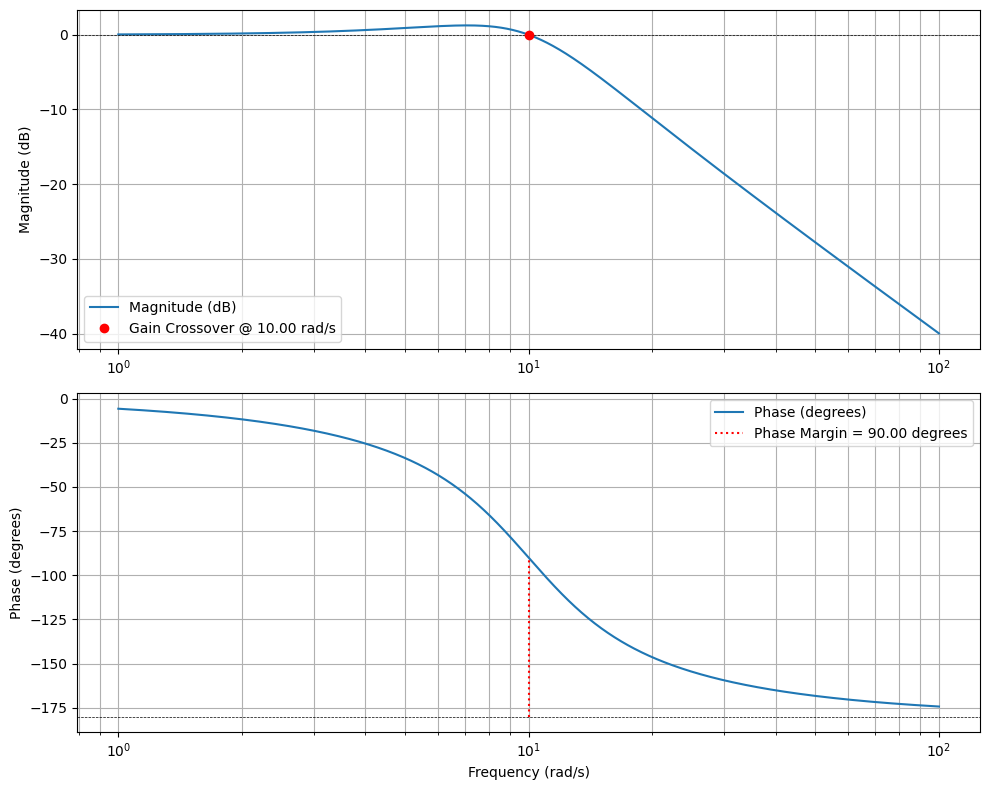

In [10]:
def polar_plot_with_margins_delay(num, den, delay_num=None, delay_den=None):
    if delay_num is not None and delay_den is not None:
        delay_sys = ct.TransferFunction(delay_num, delay_den)
        sys = ct.series(ct.TransferFunction(num, den), delay_sys)
    else:
        sys = ct.TransferFunction(num, den)

    gm, pm, wcg, wcp = ct.margin(sys)

    # mag_d, phase_d, omega_d = ct.bode_plot(delay_sys, dB=True, deg=True, plot=False)
    # mag_d = 20 * np.log10(mag_d)
    # phase_d = np.degrees(phase_d)


    # mag, phase, omega = ct.bode_plot(sys, dB=True, deg=True, plot=False)
    # mag = 20 * np.log10(mag)
    # phase = np.degrees(phase)

    # Define the frequency range (in rad/s)
    omega = np.logspace(-1, 2, 1000)  # 0.1 to 100 rad/s, logarithmically spaced

    # Compute the frequency response G(jω) for each ω
    mag, phase, omega = control.freqresp(sys, omega)

    # Create the polar plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))

    # Plot |G(jω)| vs. phase
    ax.plot(phase, mag, label='Polar Plot of G(jω)')

    # plt.ylabel('Phase (degrees)')
    # plt.xlabel('Frequency (rad/s)')
    # plt.legend(loc='best')
    # plt.grid(True, which="both")

    print("Gain Margin (dB):", 20 * np.log10(gm) if gm > 0 else 'Infinity')
    print("Phase Margin (degrees):", pm)
    print("Gain Crossover Frequency (rad/s):", wcp)
    print("Phase Crossover Frequency (rad/s):", wcg)

    plt.tight_layout()
    plt.show()


def bode_plot_with_margins_delay(num, den, delay_num=None, delay_den=None):
    if delay_num is not None and delay_den is not None:
        delay_sys = ct.TransferFunction(delay_num, delay_den)
        sys = ct.series(ct.TransferFunction(num, den), delay_sys)
    else:
        sys = ct.TransferFunction(num, den)

    gm, pm, wcg, wcp = ct.margin(sys)

    mag_d, phase_d, omega_d = ct.bode_plot(delay_sys, dB=True, deg=True, plot=False)
    mag_d = 20 * np.log10(mag_d)
    phase_d = np.degrees(phase_d)


    mag, phase, omega = ct.bode_plot(sys, dB=True, deg=True, plot=False)
    mag = 20 * np.log10(mag)
    phase = np.degrees(phase)

    plt.figure(figsize=(10, 8))
    plt.subplot(2, 1, 1)
    plt.semilogx(omega, mag, label='Magnitude (dB)')
    #plt.semilogx(omega_d, mag_d, label='Magnitude (dB)')

    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

    if not np.isnan(wcp):
        plt.plot(wcp, 0, 'ro', label=f'Gain Crossover @ {wcp:.2f} rad/s')
    if gm != float('inf'):
        plt.vlines(wcg, 0, -20 * np.log10(gm), color='red', linestyle=':', label=f'Gain Margin = {20 * np.log10(gm):.2f} dB')

    plt.ylabel('Magnitude (dB)')
    plt.legend(loc='best')
    plt.grid(True, which="both")

    plt.subplot(2, 1, 2)
    plt.semilogx(omega, phase, label='Phase (degrees)')
    #plt.semilogx(omega_d, phase_d, label='Phase (degrees)')

    plt.axhline(-180, color='black', linewidth=0.5, linestyle='--')

    if not np.isnan(wcg):
        plt.plot(wcg, -180, 'bo', label=f'Phase Crossover @ {wcg:.2f} rad/s')
    if pm != float('inf'):
        plt.vlines(wcp, -180, -180 + pm, color='red', linestyle=':', label=f'Phase Margin = {pm:.2f} degrees')

    plt.ylabel('Phase (degrees)')
    plt.xlabel('Frequency (rad/s)')
    plt.legend(loc='best')
    plt.grid(True, which="both")

    print("Gain Margin (dB):", 20 * np.log10(gm) if gm > 0 else 'Infinity')
    print("Phase Margin (degrees):", pm)
    print("Gain Crossover Frequency (rad/s):", wcp)
    print("Phase Crossover Frequency (rad/s):", wcg)

    plt.tight_layout()
    plt.show()

def update_bode_plot(b):
    clear_output(wait=True)
    display(widgets.VBox([numerator_text, denominator_text, delay_slider, plot_button, polar_plot_button]))

    try:
        num = [float(x) for x in numerator_text.value.split(',')]
        den = [float(x) for x in denominator_text.value.split(',')]
        delay = delay_slider.value

        delay_num, delay_den = ct.pade(delay, n=10)
        bode_plot_with_margins_delay(num, den, delay_num, delay_den)
    except ValueError:
        print("Please enter valid coefficients separated by commas.")

def update_polar_plot(b):
    clear_output(wait=True)
    display(widgets.VBox([numerator_text, denominator_text, delay_slider, plot_button, polar_plot_button]))

    try:
        num = [float(x) for x in numerator_text.value.split(',')]
        den = [float(x) for x in denominator_text.value.split(',')]
        delay = delay_slider.value

        delay_num, delay_den = ct.pade(delay, n=10)
        polar_plot_with_margins_delay(num, den, delay_num, delay_den)
    except ValueError:
        print("Please enter valid coefficients separated by commas.")

numerator_text = widgets.Text(value='100', description='Numerator:', placeholder='e.g., 10,4')
denominator_text = widgets.Text(value='1,10,100', description='Denominator:', placeholder='e.g., 12,30,50')

delay_slider = widgets.FloatSlider(
    value=0.0,
    min=0.0,
    max=2.0,
    step=0.01,
    description='Time Delay (s):',
    continuous_update=False
)

plot_button = widgets.Button(description="Plot Bode")
polar_plot_button = widgets.Button(description="Plot Polar")

plot_button.on_click(update_bode_plot)
polar_plot_button.on_click(update_polar_plot)

display(widgets.VBox([numerator_text, denominator_text, delay_slider, plot_button, polar_plot_button]))

# Bode Obstacle Course



The Bode obstacle course can be used to design a control system's open-loop frequency response to meet certain performance requirements in the closed-loop system. It describes how specific requirements on tracking, disturbance rejection, and noise rejection manifest as constraints or "obstacles" in the Bode plot of the open-loop transfer function $ L(j\omega) $.

Obstacles on the Bode plot represent frequency regions where the open-loop gain $ |L(j\omega)| $ must meet specific values.

**Low-frequency Obstacle:**  
To achieve good tracking and disturbance rejection, the sensitivity function $ \left| S(j\omega) \right| = \frac{1}{\left| 1 + L(j\omega) \right|} $ should be small at low frequencies. This requires $ |L(j\omega)| $ to be large in the low-frequency range.  
This appears as an obstacle where the open-loop gain $ |L(j\omega)| $ must be higher than a threshold $ |W_1(j\omega)| $ at low frequencies.

**High-frequency Obstacle:**  
To suppress high-frequency noise, the complementary sensitivity function $ \left| T(j\omega) \right| = \frac{L(j\omega)}{\left| 1 + L(j\omega) \right|} $ should be small at high frequencies. This requires $ |L(j\omega)| $ to be small in the high-frequency range.  
This appears as an obstacle where the open-loop gain $ |L(j\omega)| $ must be lower than a threshold $ |W_2(j\omega)^{-1}| $ at high frequencies.

$ |L(j\omega)| $ should be:

* At low frequencies high enough to satisfy the tracking and disturbance constraints.
* At high frequencies low enough to attenuate noise effectively.
